In [1]:
# All the imports of the modules 
import pandas as pd
import numpy as np
import Viz as mviz
import PitchControl as mpc
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
import math

In [2]:
# Import the data of all games of liverpool and opposition
tracking_home = pd.read_csv('liverpool_tracking.csv')
tracking_away = pd.read_csv('opposition_tracking.csv')

In [3]:
params = mpc.default_model_params(3)

In [6]:

starting_frame = 1212
end_frame = 1350
f = 20
    
def make_frame(t):
    t2 = int(math.ceil(t*f+0.0001)-1)
    
    PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(t2+starting_frame, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50, team_pass='Home')
    fig, ax = mviz.plot_pitchcontrol_for_event(t2+starting_frame,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True, team_pass='Home') 
    
    image = mplfig_to_npimage(fig)
    return image # returns a 8-bit RGB array

clip = mpy.VideoClip(make_frame, duration=((end_frame-starting_frame)/f)).set_fps(f) # 2 seconds
clip.write_videofile("Liverpool_4-0_Barcelona_UCL.mp4")#video file is saved


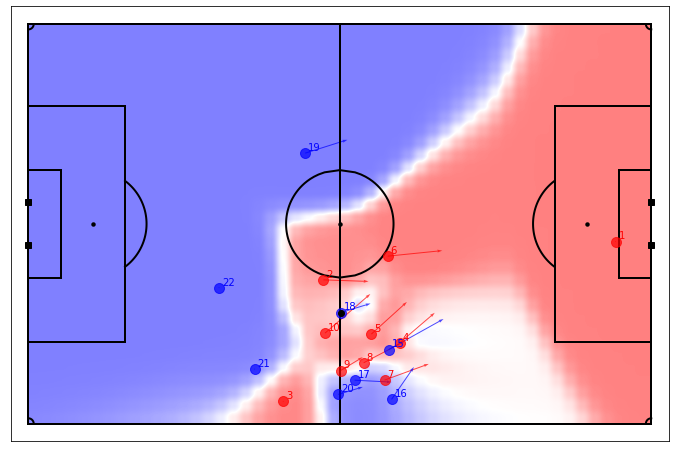

In [16]:
frame = 30
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(frame, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50, team_pass='Home')
fig,ax = mviz.plot_pitchcontrol_for_event(frame,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True, team_pass='Home') 

In [ ]:
import matplotlib.pyplot as plt

frame = 30
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(frame, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50, team_pass='Home')
mviz.plot_pitchcontrol_for_event(frame,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True, team_pass='Home')

plt.savefig('mo-goal.png', bbox_inches='tight')
